In [30]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers
 
import tensorflow as tf
import matplotlib.pyplot as plt

In [31]:
SEED_VALUE = 42
 
# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

0. CRIM - per capita crime rate by town
1. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
2. INDUS - proportion of non-retail business acres per town.
3. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
4. NOX - nitric oxides concentration (parts per 10 million)
5. RM - average number of rooms per dwelling
6. AGE - proportion of owner-occupied units built prior to 1940
7. DIS - weighted distances to five Boston employment centres
8. RAD - index of accessibility to radial highways
9. TAX - full-value property-tax rate per $10,000

In [32]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
 
print(X_train.shape)
print("\n")
print("Input features: ", X_train[0])
print("\n")
print("Output target: ", y_train[0])

(404, 13)


Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2


In [33]:
boston_features = {
    'Average Number of Rooms':5,
}
 
X_train_1d = X_train[:, boston_features['Average Number of Rooms']]
X_test_1d = X_test[:, boston_features['Average Number of Rooms']]
X_train_2d = X_train[:, 5:7]
X_test_2d = X_test[:, 5:7]

In [34]:
print(X_train.shape)
print(X_train_2d.shape)

(404, 13)
(404, 2)


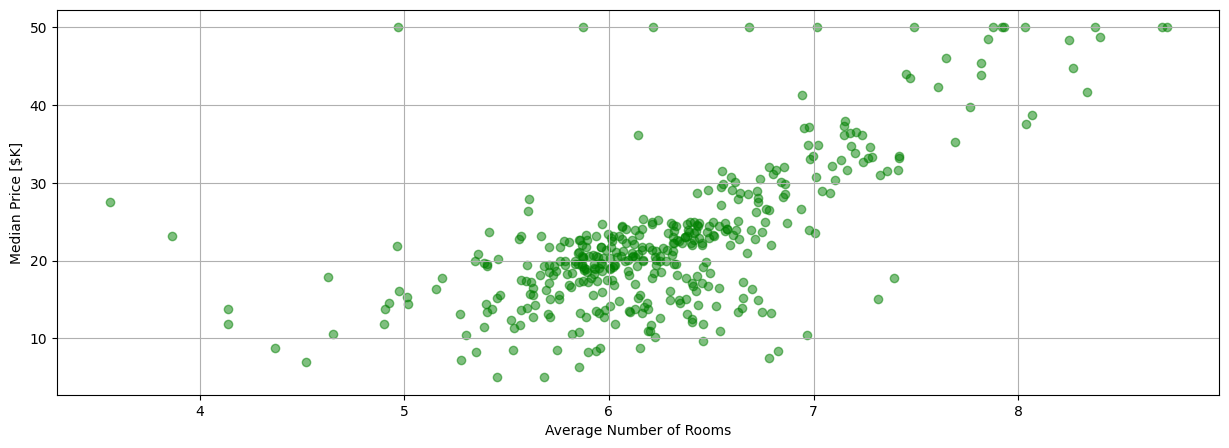

In [35]:
plt.figure(figsize=(15, 5))
 
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Price [$K]')
plt.grid("on")
plt.scatter(X_train[:,5:6].flatten(), y_train, color='green',alpha=0.5);

In [36]:
model = Sequential()
 
# Define the model consisting of a single neuron.
#model.add(Dense(units=1, input_shape=(1,)))
model.add(tf.keras.layers.Dense(1,input_shape=(1,)))
#model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(1))
 
    
# Display a summary of the model architecture.
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.005),
              loss='mae',metrics='RootMeanSquaredError')

In [38]:
history = model.fit(X_train[:,5:6], 
                    y_train, 
                    batch_size=16, 
                    epochs=100, 
                    validation_split=0.3)

Epoch 1/100
18/18 [==============================] - 0s 9ms/step - loss: 23.2855 - root_mean_squared_error: 24.8814 - val_loss: 24.2637 - val_root_mean_squared_error: 26.3503
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 22.5329 - root_mean_squared_error: 24.1709 - val_loss: 23.5846 - val_root_mean_squared_error: 25.7065
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 21.8689 - root_mean_squared_error: 23.5422 - val_loss: 22.9283 - val_root_mean_squared_error: 25.0862
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 21.2150 - root_mean_squared_error: 22.9260 - val_loss: 22.2737 - val_root_mean_squared_error: 24.4695
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 20.5617 - root_mean_squared_error: 22.2990 - val_loss: 21.6185 - val_root_mean_squared_error: 23.8545
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 19.9085 - root_mean_squared_error: 21.6808 - val_los

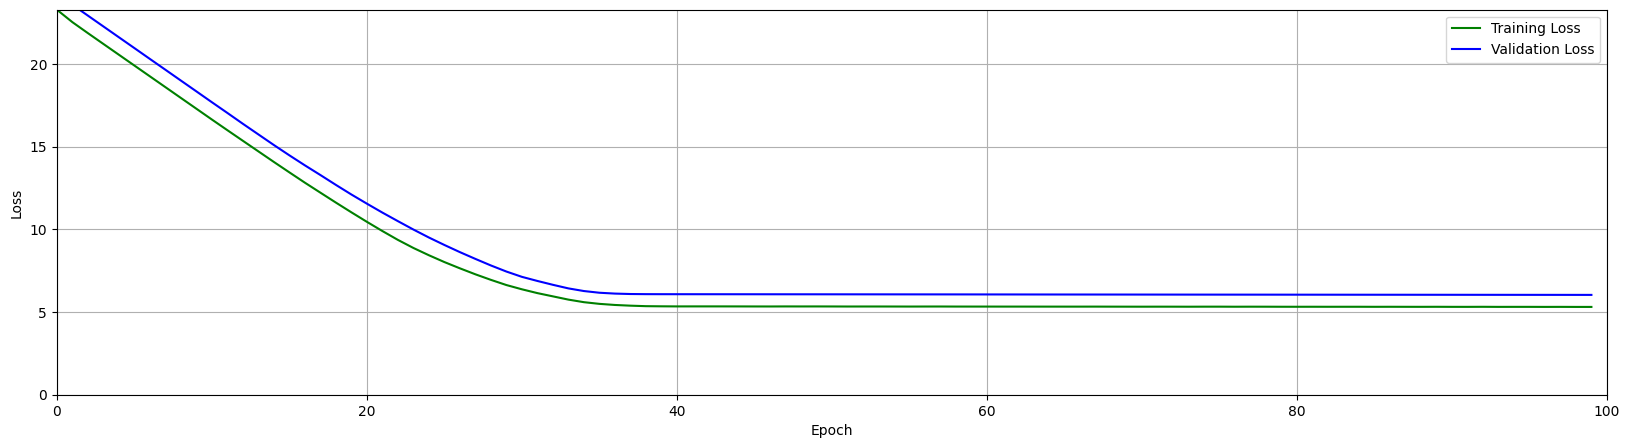

In [39]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, np.max(history.history['loss'])])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

plot_loss(history)   

In [27]:
np.max(history.history['loss'])

382.8420104980469

In [9]:
# Predict the median price of a home with [3, 4, 5, 6, 7] rooms.
x = [3, 4, 5, 6, 7]
y_pred = model.predict(x)
for idx in range(len(x)):
    print("Predicted price of a home with {} rooms: ${}K".format(x[idx], int(y_pred[idx]*10)/10))



1/1 [==============================] - 0s 143ms/step
Predicted price of a home with 3 rooms: $-2.3K
Predicted price of a home with 4 rooms: $-3.1K
Predicted price of a home with 5 rooms: $-3.9K
Predicted price of a home with 6 rooms: $-4.7K
Predicted price of a home with 7 rooms: $-5.5K


In [24]:
x = tf.linspace(3, 9, 10)
 
# Use the model to predict the dependent variable.
y = model.predict(x)
x

1/1 [==============================] - 0s 54ms/step


<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([3.        , 3.66666667, 4.33333333, 5.        , 5.66666667,
       6.33333333, 7.        , 7.66666667, 8.33333333, 9.        ])>

In [25]:
def plot_data(x_data, y_data, x, y, title=None):
     
    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

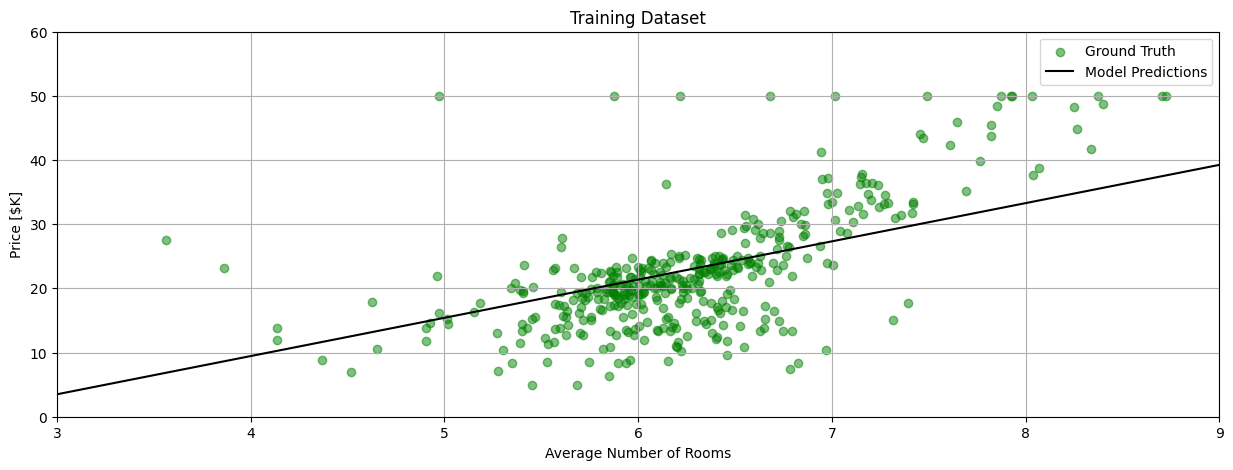

In [26]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

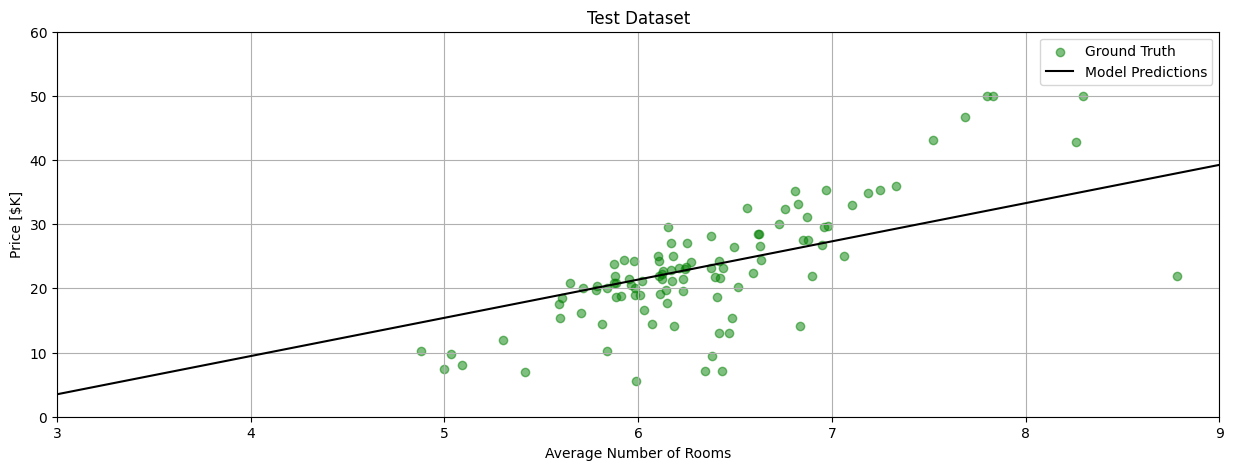

In [27]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')